In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("smsspamcollection.tsv", sep = "\t")
print("\n==== Sample data====")
df.head()


==== Sample data====


,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

print("Count vectorized Matrix shape : ", X_train_counts.shape)

Count vectorized Matrix shape :  (3733, 7082)


In [9]:
count_feature_names = count_vect.get_feature_names_out()

sample_index = 3

sample_message = X_train.iloc[sample_index]

sample_vector = X_train_counts[sample_index]

print("Sample Message : ", sample_message)
print()

print("Count Vector (non-zero terms) : ")

df_count_sample = pd.DataFrame(sample_vector.toarray(),
                               columns = count_feature_names)

print(df_count_sample.loc[:, df_count_sample.any()].T)

Sample Message :  Its just the effect of irritation. Just ignore it

Count Vector (non-zero terms) : 
            0
effect      1
ignore      1
irritation  1
it          1
its         1
just        2
of          1
the         1


NLP Project Life cycle

1) CV + TF-IDF => TfidfTransformer

Or

   TF-IDF only => Tfidfvectorizer

2) Classification (spam / ham)

3) Evaluation of model performance

4) Check most impactful word for spam and ham

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print("TF-IDF Matrix shape : ", X_train_tfidf.shape)

TF-IDF Matrix shape :  (3733, 7082)


In [11]:
sample_vector_tfidf = X_train_tfidf[sample_index]

df_tfidf_sample = pd.DataFrame(sample_vector_tfidf.toarray(),
                               columns = count_feature_names)

In [12]:
print(" TF_IDF (from count) Vector (non-zero terms) : ")

print(df_tfidf_sample.loc[:, df_tfidf_sample.any()].T)

 TF_IDF (from count) Vector (non-zero terms) : 
                   0
effect      0.472068
ignore      0.431804
irritation  0.495621
it          0.185849
its         0.248006
just        0.432172
of          0.194944
the         0.155672


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_tfidf_direct = vectorizer.fit_transform(X_train)

print("TF-IDF Matrix shape : ", X_train_tfidf_direct.shape)

TF-IDF Matrix shape :  (3733, 7082)


In [14]:
direct_feature_names = vectorizer.get_feature_names_out()

sample_vector_direct = X_train_tfidf_direct[sample_index]

df_direct_sample = pd.DataFrame(sample_vector_direct.toarray(),
                               columns = direct_feature_names)

print("Direct TF-IDF Vector (non-zero terms) : ")

print(df_direct_sample.loc[:, df_direct_sample.any()].T)

Direct TF-IDF Vector (non-zero terms) : 
                   0
effect      0.472068
ignore      0.431804
irritation  0.495621
it          0.185849
its         0.248006
just        0.432172
of          0.194944
the         0.155672


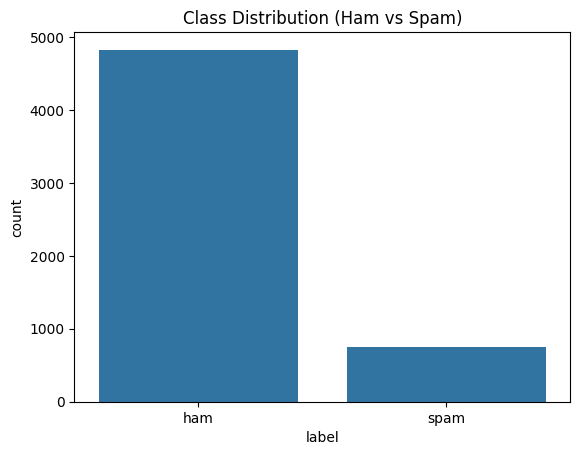

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = "label", data = df)
plt.title("Class Distribution (Ham vs Spam)")
plt.show()

In [17]:
X_train_tfidf_direct = vectorizer.fit_transform(X_train)
X_test_tfidf_direct = vectorizer.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = MultinomialNB()

clf.fit(X_train_tfidf_direct, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [19]:
y_pred = clf.predict(X_test_tfidf_direct)

misclassified = X_test[y_pred != y_test]

for i, msg in enumerate(misclassified[:5]):

    print(f"\nMessage : {msg}")


    print(f"{i+1}. Actual : {y_test.iloc[i]}, Predicted : {y_pred[i]} ")


Message : Reminder: You have not downloaded the content you have already paid for. Goto http://doit. mymoby. tv/ to collect your content.
1. Actual : ham, Predicted : ham 

Message : Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on 09065394973 from Landline DATEBox1282EssexCM61XN 150p/min 18
2. Actual : ham, Predicted : ham 

Message : Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg £1.50
3. Actual : ham, Predicted : ham 

Message : Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.
4. Actual : ham, Predicted : ham 

Message : Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. How about we go slo n hard! Txt XXX SLO(4msgs)
5. Actual : ham, Predicted : ham 


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.72      0.83       246

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.91      1839
weighted avg       0.96      0.96      0.96      1839



In [21]:
confusion_matrix(y_test, y_pred)

array([[1593,    0],
       [  70,  176]])

In [22]:
accuracy_score(y_test, y_pred)

0.9619358346927678

In [23]:
def predict_message(msg):

    msg_tfidf = vectorizer.transform([msg])

    pred = clf.predict(msg_tfidf)[0]

    prob = clf.predict_proba(msg_tfidf).max()

    print(f"\nPrediction : {pred.upper()} (Confidence : {prob:.2f})")

In [24]:
predict_message("Congratulation! You've won a $1000 gift card.")


Prediction : HAM (Confidence : 0.58)


In [25]:
predict_message("Hi, how are you?")


Prediction : HAM (Confidence : 0.99)


In [26]:
predict_message("Free gift! click here")


Prediction : HAM (Confidence : 0.67)


In [27]:
feature_names = np.array(vectorizer.get_feature_names_out())

class_labels = clf.classes_

log_probs = clf.feature_log_prob_

print("\n---- Top 15 indicative words for each class ----")

for i, label in enumerate(class_labels):

    top_indices = log_probs[i].argsort()[::-1][:5]

    top_words = feature_names[top_indices]

    print(f"\nTop words for {label} : ")

    print(", ".join(top_words))


---- Top 15 indicative words for each class ----

Top words for ham : 
you, to, the, me, in

Top words for spam : 
to, call, free, your, or


In [29]:
!pip install wordcloud

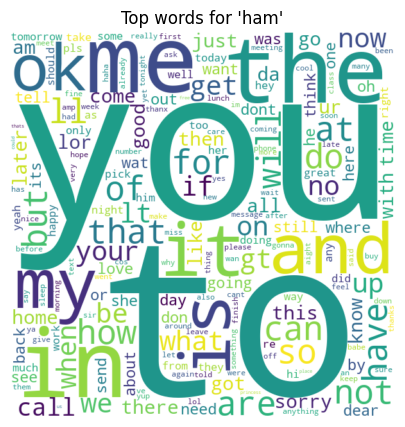

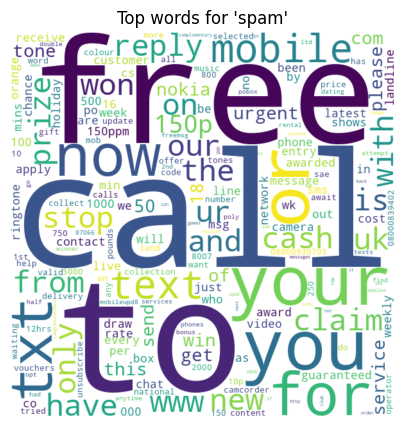

In [30]:
from wordcloud import WordCloud

for i, label in enumerate(class_labels):

    word_scores = {word : log_probs[i, idx] for idx, word in enumerate(feature_names)}

    wc = WordCloud(width = 600, height = 600,
                   background_color = 'white').generate_from_frequencies(word_scores)

    plt.figure(figsize = (8, 5))

    plt.imshow(wc, interpolation = 'bilinear')

    plt.axis('off')

    plt.title(f"Top words for '{label}'")

    plt.show()

In [31]:
# chi square scores

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)

chi2_scores, p_vals = chi2(X_train_tfidf_direct, y_train_encoded)

top_indices = chi2_scores.argsort()[::-1][:20]

print("\n[chi-square] Top 20 informative words : ")

for i in top_indices:

    print(f"{feature_names[i]} (score = {chi2_scores[i]})")


[chi-square] Top 20 informative words : 
free (score = 95.10333699127757)
txt (score = 79.73173708565851)
claim (score = 75.39881117737156)
www (score = 68.24816233497125)
mobile (score = 67.0938716560533)
prize (score = 60.68665777444921)
150p (score = 50.56889976632561)
call (score = 50.30542187761418)
uk (score = 49.58334731936588)
tone (score = 46.23243106367867)
reply (score = 45.553054530790064)
stop (score = 45.43623025702101)
cash (score = 44.95661274055723)
18 (score = 44.395374720291535)
guaranteed (score = 43.71289098425143)
nokia (score = 43.28539169510242)
win (score = 40.69031280832194)
urgent (score = 39.51333430039764)
1000 (score = 39.327930410511364)
service (score = 38.98300607787369)


In [33]:
!pip install imbalanced-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.7.0

   ---------------------------------------- 0/3 [scikit-learn]
    Uninstalling scikit-learn-1.7.0:
   ---------------------------------------- 0/3 [scikit-learn]
      Successfully uninstalled scikit-learn-1.7.0
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/

  You can safely remove it manually.


In [39]:
# SMOTE
from imblearn.over_sampling import SMOTE

X_train_dense = X_train_tfidf_direct.toarray()

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)

smote = SMOTE(random_state = 42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_dense, y_train_encoded)

print("Before SMOTE : ", np.bincount(y_train_encoded))

print("After SMOTE : ", np.bincount(y_train_resampled))

Before SMOTE :  [3232  501]
After SMOTE :  [3232 3232]


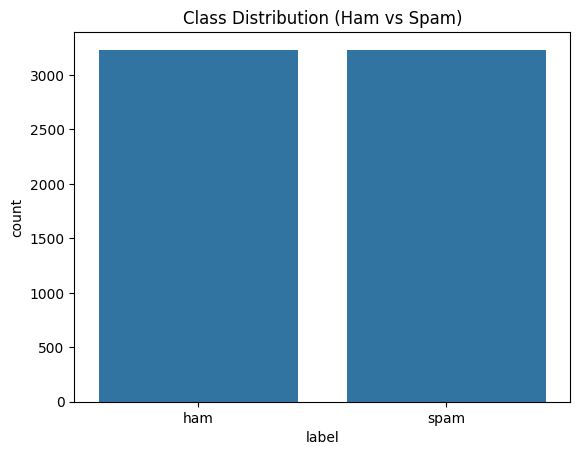

In [40]:
y_resampled_labels = le.inverse_transform(y_train_resampled)

df_resampled = pd.DataFrame({'label' : y_resampled_labels})

sns.countplot(x = "label", data = df_resampled)

plt.title("Class Distribution (Ham vs Spam)")

plt.show()

In [53]:
clf_smote = MultinomialNB()

clf_smote.fit(X_train_resampled, y_train_resampled)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\kisha\\anaconda3\\envs\\nlp_env\\Lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\kisha\\anaconda3\\envs\\nlp_env\\Lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

MultinomialNB()

In [42]:
X_test_dense = X_test_tfidf_direct.toarray()

y_test_encoded = le.transform(y_test)

y_pred_smote = clf_smote.predict(X_test_dense)

y_pred_labels = le.inverse_transform(y_pred_smote)

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1593
        spam       0.90      0.96      0.93       246

    accuracy                           0.98      1839
   macro avg       0.95      0.97      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [43]:
predict_message("Congratulation! You've won a $1000 gift card.")


Prediction : HAM (Confidence : 0.58)


In [44]:
predict_message("Hi, how are you?")


Prediction : HAM (Confidence : 0.99)


In [45]:
predict_message("Free gift! click here")


Prediction : HAM (Confidence : 0.67)


In [46]:
# WSD

In [47]:
import nltk

from nltk.corpus import semcor
from nltk.tree import Tree
import re
nltk.download('semcor')

sent = semcor.tagged_sents(tag='sem')[999]

print("SemCor Tagged Sentence : ")

for token in sent:
    print(token)

print("\n" + "-"*50)

[nltk_data] Downloading package semcor to
[nltk_data]     C:\Users\kisha\AppData\Roaming\nltk_data...


SemCor Tagged Sentence : 
(Lemma('one-upmanship.n.01.one-upmanship') Oneupmanship)
['is']
(Lemma('practice.v.01.practice') practiced)
['by']
['both']
(Lemma('side.n.02.side') sides)
['in']
['a']
(total.s.00 total)
(Lemma('war.n.01.war') war)
['.']

--------------------------------------------------


In [48]:
words = []

for token in sent:

    if isinstance(token, Tree):

        for leaf in token.leaves():

            if isinstance(leaf, list):

                words.extend([str(subleaf) for subleaf in leaf])

            else:

                words.append(str(leaf))

    else:

        words.append(str(token))


sentence = " ".join(words)
sentence = re.sub(r"\s+([?.!,;:])", r'\1', sentence)

print(sentence)

Oneupmanship ['is'] practiced ['by'] ['both'] sides ['in'] ['a'] total war ['.']


In [49]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')

sentence = "I went to the bank to deposit money."

ambiguous_word = "bank"

sense = lesk(word_tokenize(sentence), ambiguous_word)

print("Sense : ", sense)

print("Definition : ", sense.definition())

Sense :  Synset('savings_bank.n.02')
Definition :  a container (usually with a slot in the top) for keeping money at home


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
sentence = "He sat on the bank of the river."

ambiguous_word = "bank"

sense = lesk(word_tokenize(sentence), ambiguous_word)

print("Sense : ", sense)

print("Definition : ", sense.definition())

Sense :  Synset('bank.v.07')
Definition :  cover with ashes so to control the rate of burning


In [51]:
# WSD using clustering

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = [

    "He sat on the bank of the river.",

    "He deposited cash into the bank.",

    "The river overflowed its bank.",

    "She applied for a loan at the bank.",

    "The pilot made a sharp bank to the left before landing.",

    "He worked hard to bank enough money for retirement.",

    "They had a picnic on the grassy bank under the willow tree.",

    "The data is stored in a memory bank within the processor."
]

target_word = "bank"

contexts = []

window_size = 5

for sent in sentences:

    words = sent.lower().split()

    indices = [i for i, w in enumerate(words) if w.strip(".,") == target_word]

    for idx in indices:

        start = max(idx - window_size, 0)

        end = min(idx + window_size + 1, len(words))

        context = words[start:idx] + words[idx+1:end]

        contexts.append(" ".join(context))

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(contexts)

df_tfidf = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())



print(df_tfidf.round(3))

df_tfidf.round(3).to_csv("tfidf_matrix.csv", index=False)

      at  before   cash  deposited  enough    for  grassy  hard     he     in  \
0  0.000   0.000  0.000      0.000    0.00  0.000   0.000  0.00  0.333  0.000   
1  0.000   0.000  0.518      0.518    0.00  0.000   0.000  0.00  0.375  0.000   
2  0.000   0.000  0.000      0.000    0.00  0.000   0.000  0.00  0.000  0.000   
3  0.587   0.000  0.000      0.000    0.00  0.492   0.000  0.00  0.000  0.000   
4  0.000   0.365  0.000      0.000    0.00  0.000   0.000  0.00  0.000  0.000   
5  0.000   0.000  0.000      0.000    0.38  0.318   0.000  0.38  0.275  0.000   
6  0.000   0.000  0.000      0.000    0.00  0.000   0.392  0.00  0.000  0.000   
7  0.000   0.000  0.000      0.000    0.00  0.000   0.000  0.00  0.000  0.402   

   ...   sat  sharp  stored    the     to   tree  under  willow  within  \
0  ...  0.46  0.000   0.000  0.411  0.000  0.000  0.000   0.000   0.000   
1  ...  0.00  0.000   0.000  0.231  0.000  0.000  0.000   0.000   0.000   
2  ...  0.00  0.000   0.000  0.262  0.000  0.

In [52]:
num_clusters = 2

kmeans = KMeans(n_clusters = num_clusters, random_state = 42)

kmeans.fit(X)

for i, context in enumerate(contexts):

    print(f"Context : {context}")

    print(f"Cluster : {kmeans.labels_[i]}\n")

Context : he sat on the of the river.
Cluster : 0

Context : he deposited cash into the
Cluster : 1

Context : the river overflowed its
Cluster : 0

Context : for a loan at the
Cluster : 1

Context : the pilot made a sharp to the left before landing.
Cluster : 1

Context : he worked hard to enough money for retirement.
Cluster : 1

Context : a picnic on the grassy under the willow tree.
Cluster : 1

Context : is stored in a memory within the processor.
Cluster : 1

